## Imports

In [23]:
import pandas as pd
import numpy as np
import panel as pn
#pn.extension('tabulator')
#pn.extension('plotly')

pn.extension()
import hvplot.pandas

pd.set_option("display.max_rows", 300, "display.min_rows", 200, "display.max_columns", 100, "display.width", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Matplotlib related
import seaborn as sns
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# Plotly related
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML

init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()
InteractiveShell.ast_node_interactivity = 'last' #denne indstilling afgør hvilke commands der giver outputs!

display(HTML("<style>.container { width:90% !important; }</style>"))



## Data

In [5]:
df = pd.read_csv(r'C:\01 SR Data partition\Jottacloud\04 Programmering\04 Python Programmering\PycharmProjects\SR-Polygon\FadeFinder\16.05.2022.csv')

#Frasorter to signaler afledt af datafejl hos Polygon
df = df[(df['GapSize'] < 4000) & (df['MarketCap'] < 500_000_000) & (df['GapSize'] > 20) & (df['PreVolume'] > 50_000)]
#df.count()

df[df['Price935'] == 0].head(10)

#df[df['Date'] > '2018-01-01']
#df.sort_values(by="GapSize",ascending=False).head(200)


,Date,Stock,GapSize,MarketCap,OpenAdjusted,OpenUnadjusted,PreVolume,PreRVOL,PreHigh,Pre$Volume,...,Price1000,Price1100,Price1300,Price1500,Change935/Gap,Change945/Gap,Change1000/Gap,Change1100/Gap,Change1300/Gap,Change1500/Gap
146,2017-05-01,OCN,27.947598,2.852233e+07,43.950,2.930,1.889319e+05,NaN,46.35,NaN,...,0.0000,43.6500,46.575,48.300000,NaN,NaN,NaN,-0.031250,0.273437,0.453125
462,2018-01-05,CPHI,286.363636,2.224959e+07,0.765,0.765,1.660414e+06,NaN,1.00,NaN,...,0.9490,0.7360,0.565,0.499922,NaN,0.266314,0.324515,-0.051146,-0.352734,-0.467510
1281,2019-03-07,BPTH,51.414309,2.782440e+08,18.200,18.200,2.721872e+06,NaN,18.29,NaN,...,24.2000,46.5600,36.300,43.000000,NaN,1.423948,0.970874,4.588997,2.928803,4.012945
2207,2020-02-27,AHPI,59.510870,6.229009e+07,5.870,5.870,4.574470e+05,NaN,7.25,NaN,...,0.0000,5.7000,6.100,9.690000,NaN,NaN,NaN,-0.077626,0.105023,1.744292
2217,2020-02-28,APT,47.445545,2.778802e+08,37.230,37.230,2.253793e+06,NaN,49.00,NaN,...,36.7150,34.9699,20.020,24.789900,NaN,-0.146219,-0.042988,-0.188656,-1.436561,-1.038406
2220,2020-02-28,CODX,35.776942,3.857876e+08,21.670,21.670,2.104320e+06,NaN,26.00,NaN,...,17.9100,18.3900,12.425,13.469900,NaN,-0.387040,-0.658494,-0.574431,-1.619089,-1.436095
2227,2020-02-28,AHPI,167.010309,9.632489e+07,41.440,41.440,8.472520e+05,NaN,67.20,NaN,...,37.9801,0.0000,19.200,24.848800,NaN,NaN,-0.133484,NaN,-0.858025,-0.640093
2237,2020-02-28,OBCI,23.121387,4.742900e+07,6.390,6.390,1.945740e+05,NaN,8.10,NaN,...,6.7499,5.1600,4.980,4.909900,NaN,0.883333,0.299917,-1.025000,-1.175000,-1.233417
2242,2020-03-02,DXR,97.674419,5.748275e+07,17.000,17.000,5.681700e+04,NaN,18.03,NaN,...,16.0000,14.1000,0.000,0.000000,NaN,-0.214083,-0.119048,-0.345238,NaN,NaN
2248,2020-03-02,CPHI,75.438596,5.396709e+07,1.000,1.000,3.870107e+06,NaN,1.45,NaN,...,1.1297,1.2601,1.125,1.160100,NaN,0.534884,0.301628,0.604884,0.290698,0.372326


## Figure

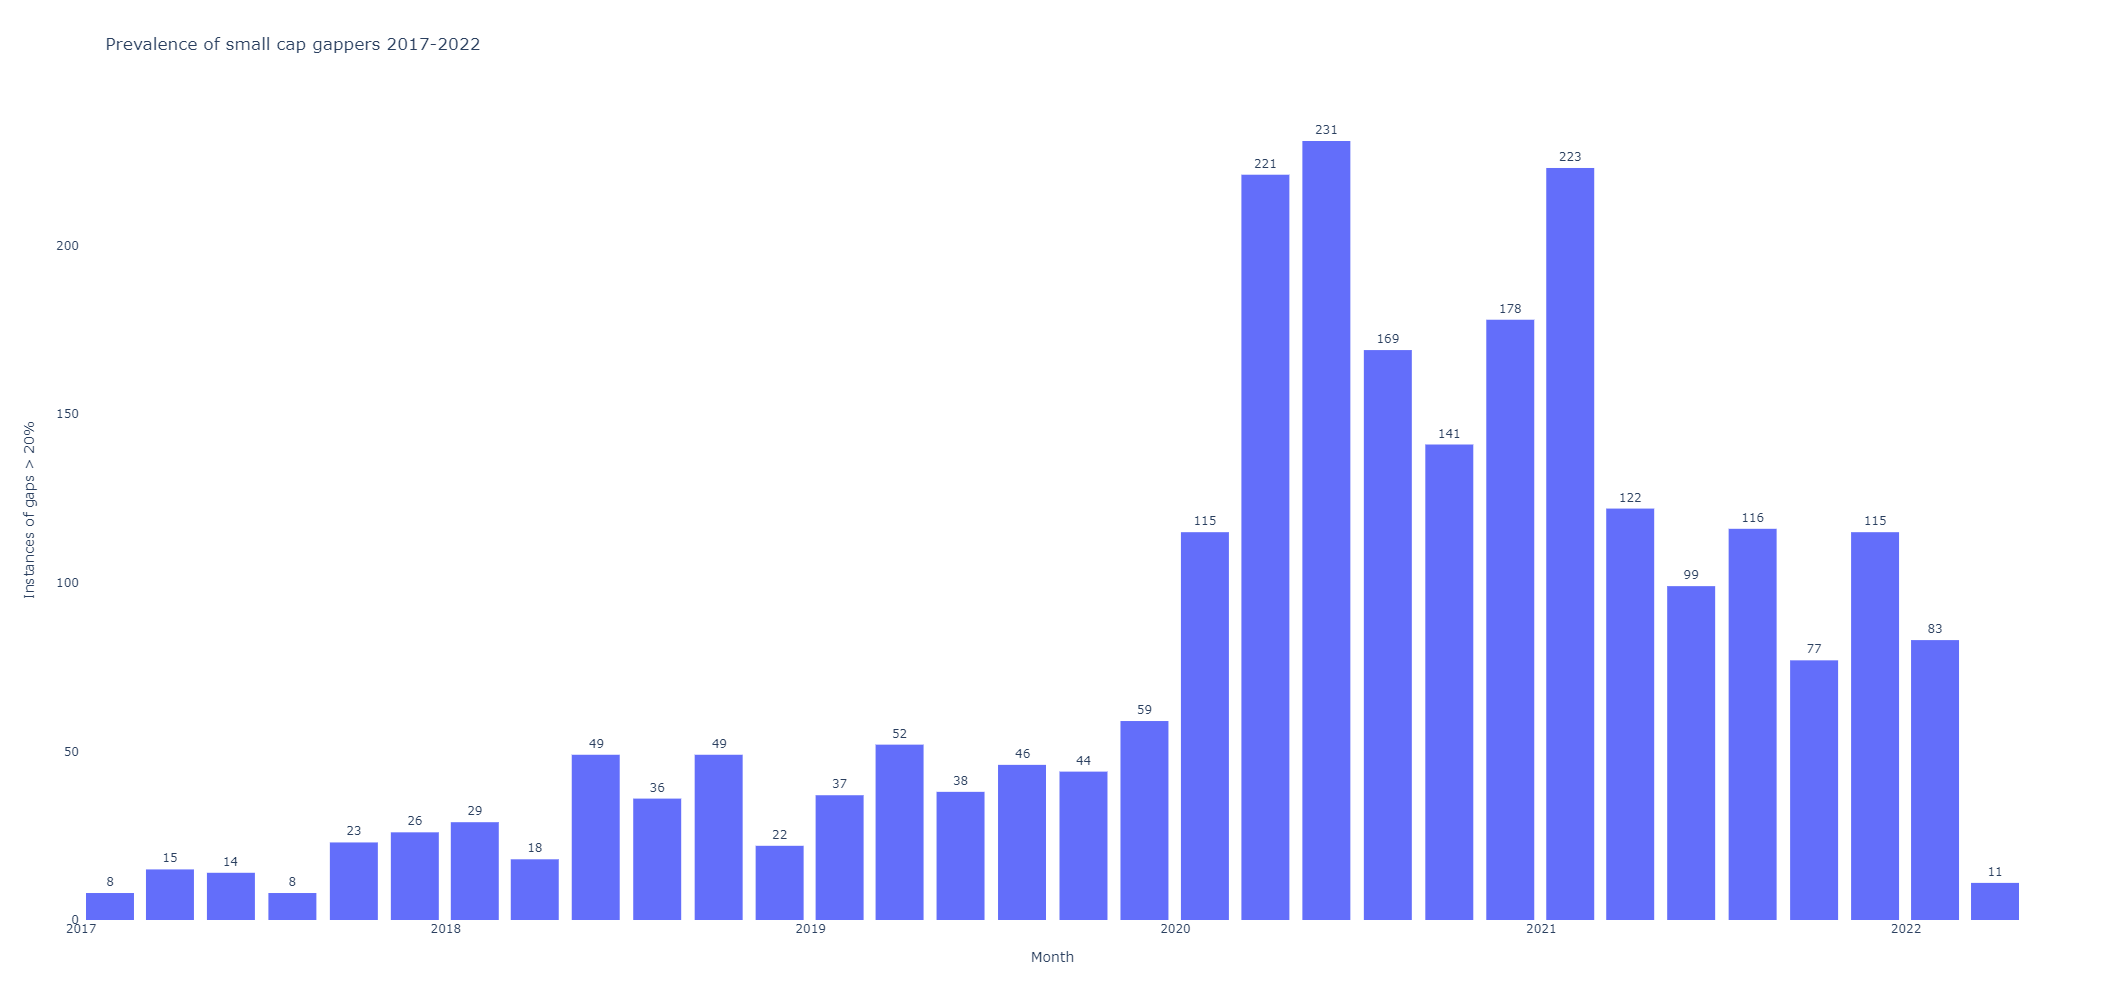

In [8]:
fig = px.histogram(df,x="Date",text_auto=True, labels={"Date":"Month"}, title="Prevalence of small cap gappers 2017-2022")
fig.update_layout(bargap=.2,height = 1000,paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')

#Genbrug fra barchart sektionen - flyt tekst udenfor søjlerne - MEN ikke indstilling af præcisionen - det gør teksten alt for lille/virker ikke

fig.update_traces(textposition='outside')

#Change Y-axis title - doesn't work in the px.hist call
fig.update_layout(uniformtext_minsize=100, yaxis_title="Instances of gaps > 20%")
#fig.update_layout()

#fig.update_layout(xaxis_tickangle=-45)



## Start på interactive plotting

In [24]:
idf = df.interactive()

In [25]:
test_pane = pn.pane.Plotly(fig)

In [32]:
plotly_pane = pn.pane.Plotly(fig)
plotly_pane

Plotly(Figure)

In [26]:
test_pane

Plotly(Figure)

In [27]:
sr_first_panel = pn.template.FastListTemplate(main=[test_pane])

In [30]:
sr_first_panel.servable()

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2426934726272] Plotly(Figure, viewport={'xaxis.range': ['2016-12-...})

In [34]:
import panel as pn

def build_dashboard():
     return plotly_pane #pn.pane.Markdown("Hello World")

if __name__.startswith("bokeh"):
    # start with panel serve script.py
    dashboard = build_dashboard()
    dashboard.servable()
if __name__ == "__main__":
    # start with python script.py
    dashboard = build_dashboard()
    dashboard.show(port=5008)

Launching server at http://localhost:5008
